# Green Building Challenge 2019
From 9PM to 1AM on Saturday Jan 26, 86 MIT students climbed the stairs of the Green Building.

In [1]:
save = False

### Section 1: General Data

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 # settings to make figure text editable in Adobe Illustrator
plt.rcParams['ps.fonttype'] = 42


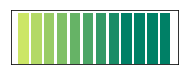

In [3]:
plt.figure(figsize=(3,1))
cmap = plt.cm.get_cmap("summer") # green color map
cmap_vals = np.flip(np.arange(-0.3,1,0.1)[:12], axis = 0)
cmap_vals_tri = cmap_vals[1:7:2]
for i in range(12):
    plt.bar(i,1,color = cmap(cmap_vals[i]))
plt.xticks([]); plt.yticks([])
plt.show()

In [4]:
raw_data = np.asarray(list(csv.reader(open("./general_green_building_challenge_2019.csv", "r"))))


In [5]:
raw_data[:2] # example of raw data


array([['Team Name', 'Individual Name', 'Individual Climbs'],
       ['Beast', 'Josh H', '35']], dtype='<U17')

In [6]:
categories = raw_data[0] # team name, individual name, individual climbs
data = np.asarray(raw_data[1:]) # table w/o categories

teams = np.unique(data[:,0]) # list of teams
student_count = len(np.unique(data[:,1])) # number of students

reps = data[:,2].astype('int') # individual climbing reps
total_reps = np.sum(reps) # total reps

avg_reps = np.round(total_reps/student_count,2) # average reps per student, rounded to the hundredths place


In [7]:
print ("Total Students: " + str(student_count) 
       + "\nTotal Climbing Reps: " + str(total_reps) 
       + "\nAverage Reps: " + str(avg_reps))


Total Students: 86
Total Climbing Reps: 886
Average Reps: 10.3


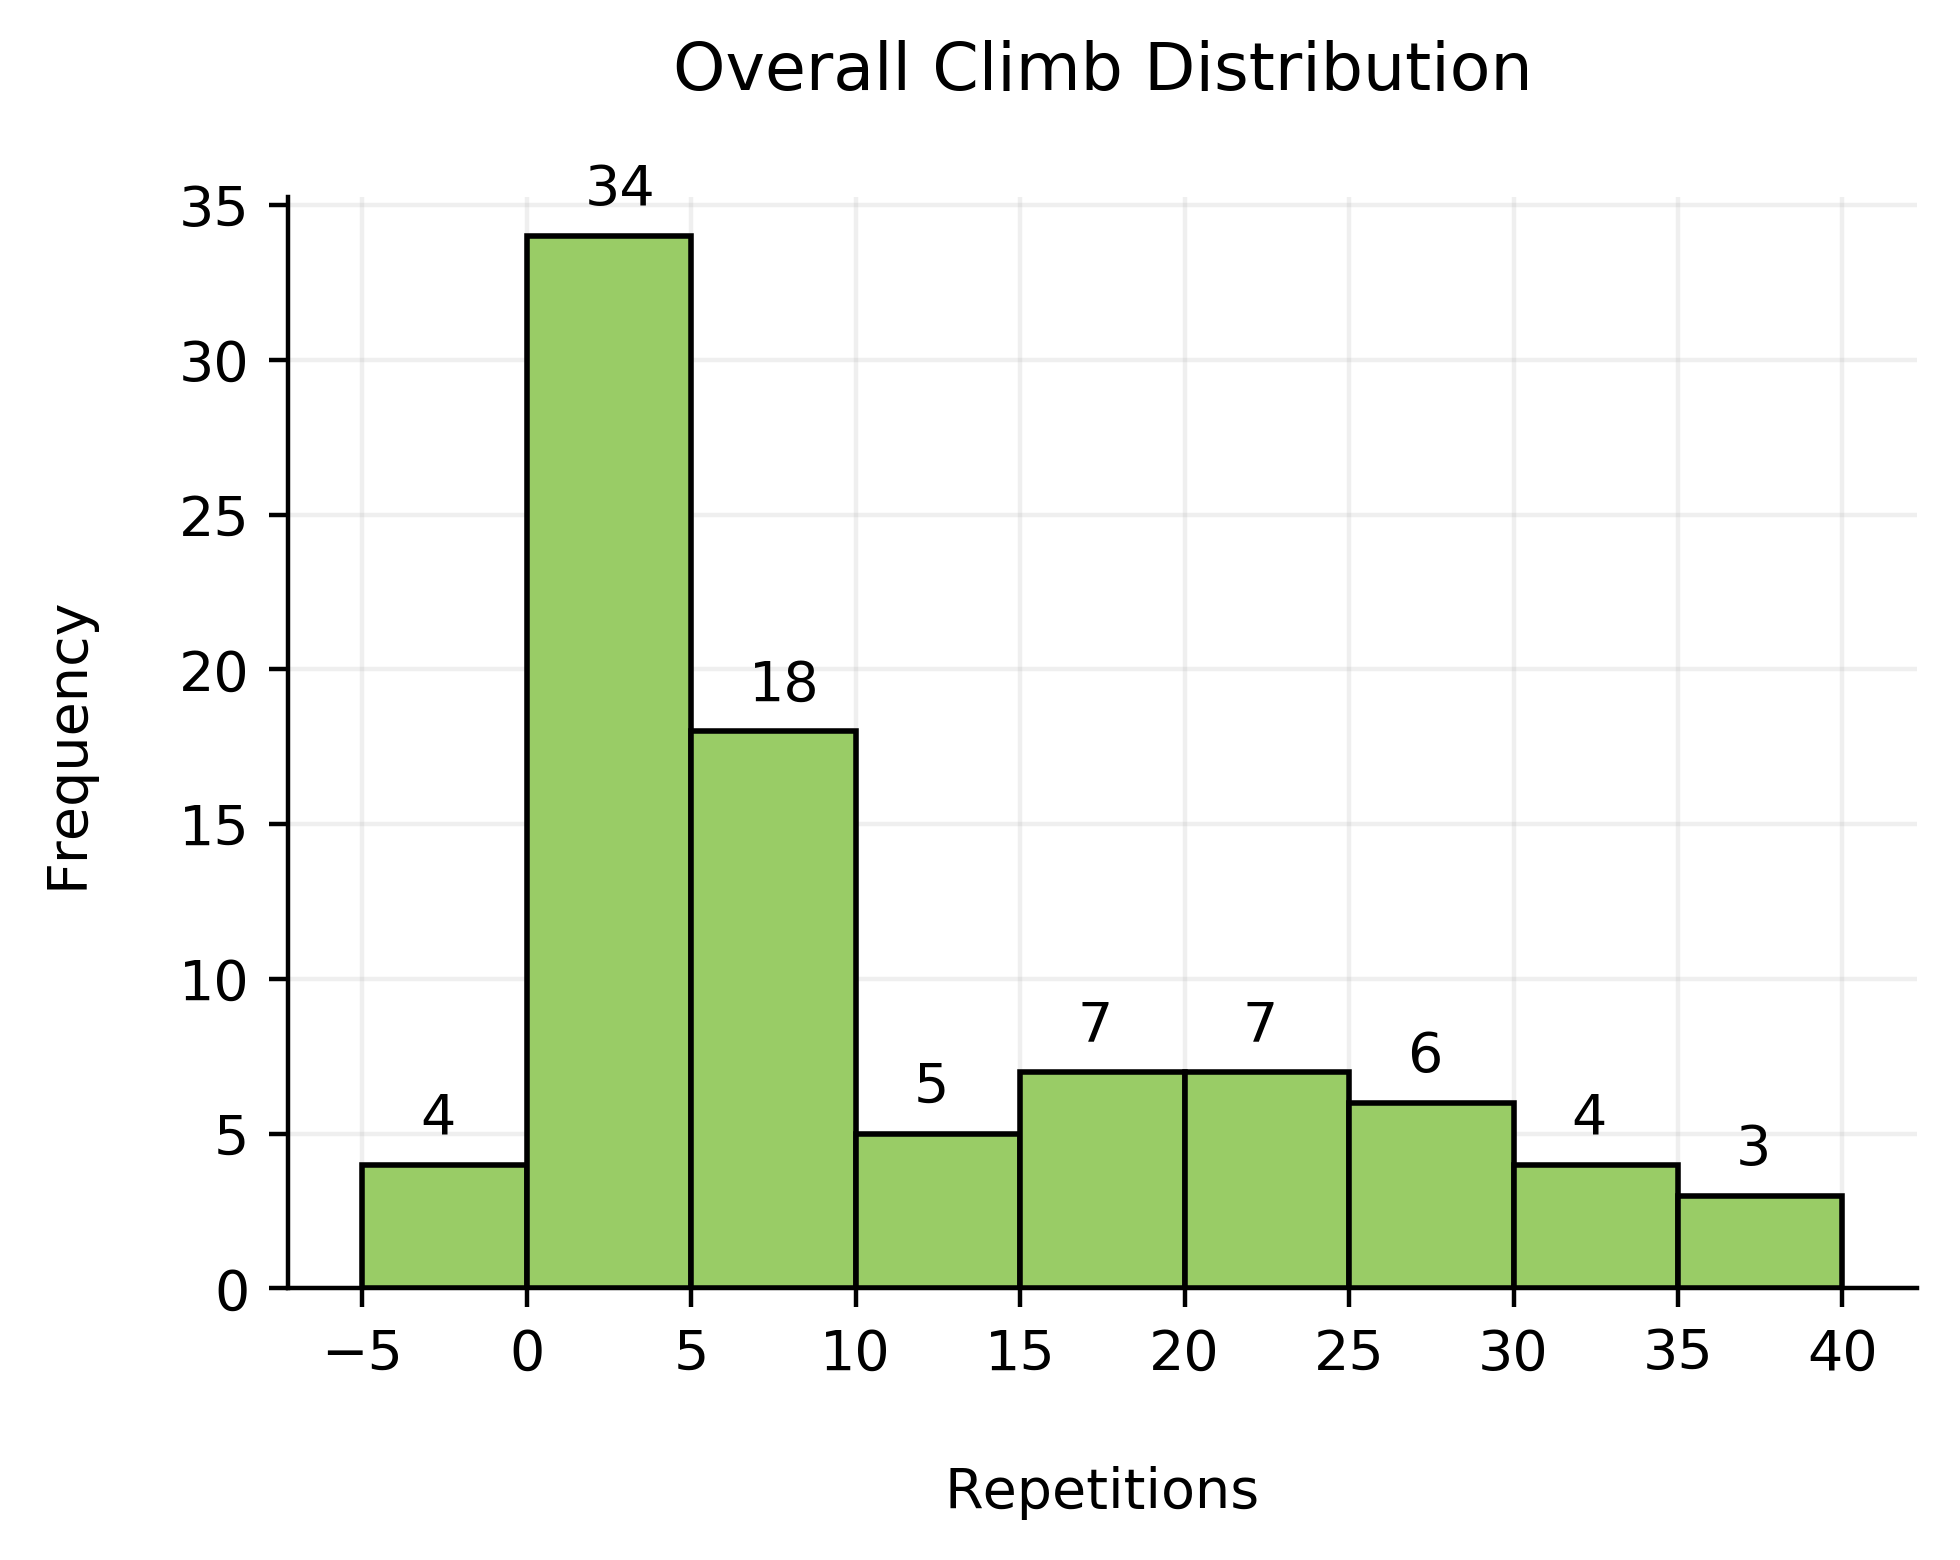

In [8]:
fig, ax = plt.subplots(figsize = (5,4), dpi = 400)

bins = np.arange(-5,41,5)

hist = plt.hist(reps, bins, color = cmap(0.6), edgecolor ="k", zorder = 99)

for i in range(len(hist[0])):
    plt.text(hist[1][i]+1.75,hist[0][i]+1, str(int(hist[0][i])))

plt.grid("on", zorder = 0, alpha = 0.2)
plt.xlabel("\nRepetitions")
plt.ylabel("Frequency\n")
plt.ylim(0,35.25)
plt.xticks(bins)
plt.title("Overall Climb Distribution\n")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
if save:
    plt.savefig("./figs/overall_distribution.pdf")
plt.show()


In [9]:
def get_team_counts(team):
    return reps[np.where(data[:,0] == team)]

In [10]:
team_totals = []
for t in teams:
    team_totals.append([t,np.sum(get_team_counts(t))])

In [11]:
def sort_teams(team_totals):
    t = team_totals.copy()
    sorted_teams = []
    while len(t) > 0:
        most = t[0]
        for i in range(1,len(t)):
            if int(t[i][1]) > int(most[1]):
                most = t[i]
        sorted_teams.append(most)
        t.remove(most)
    return sorted_teams

In [12]:
sorted_teams = sort_teams(team_totals)

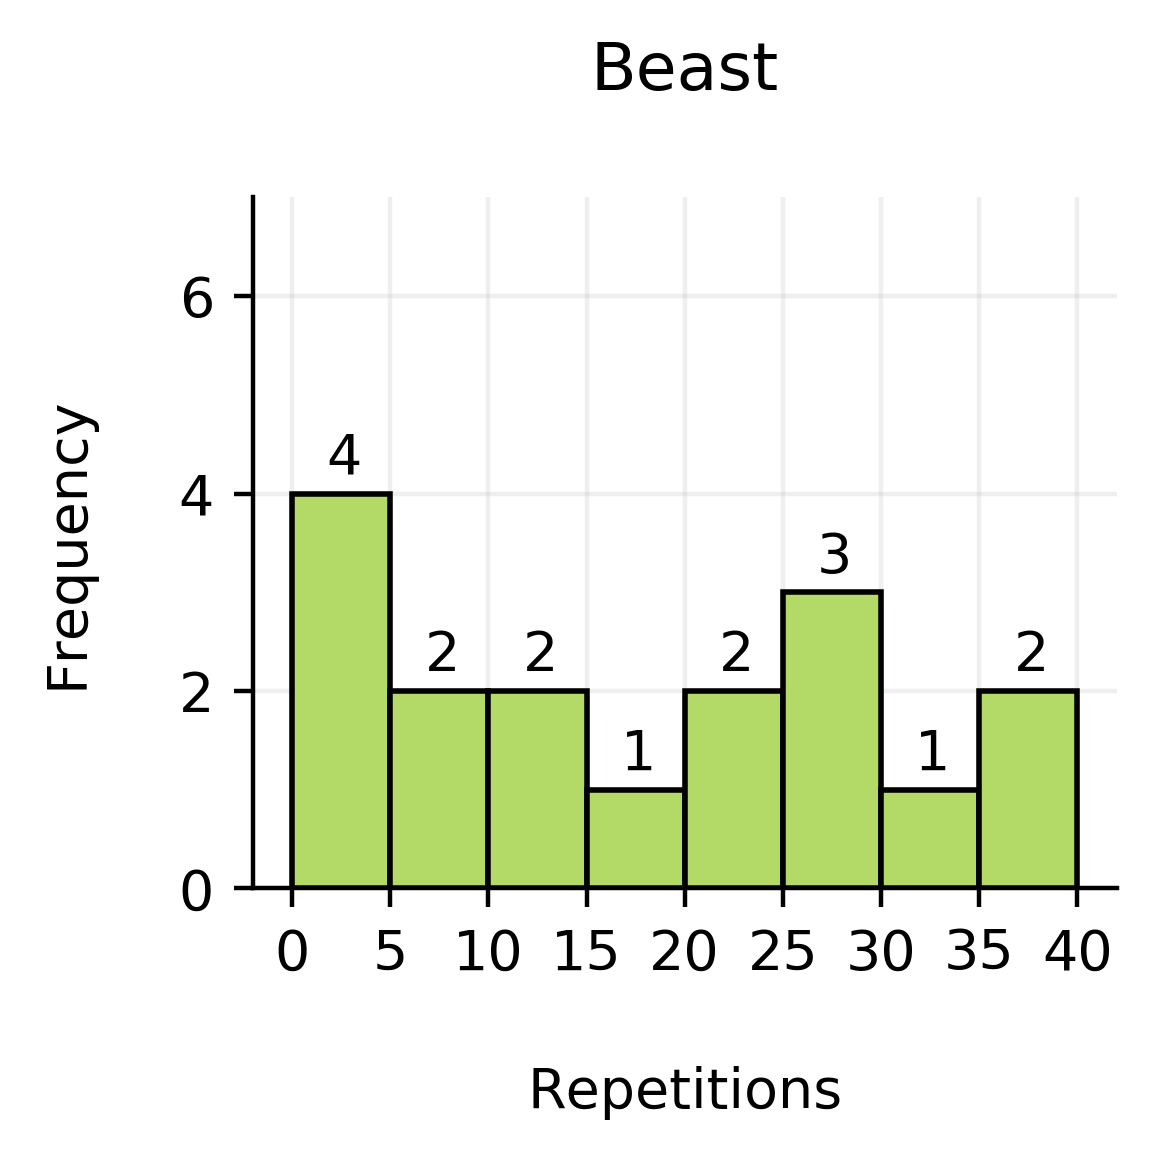

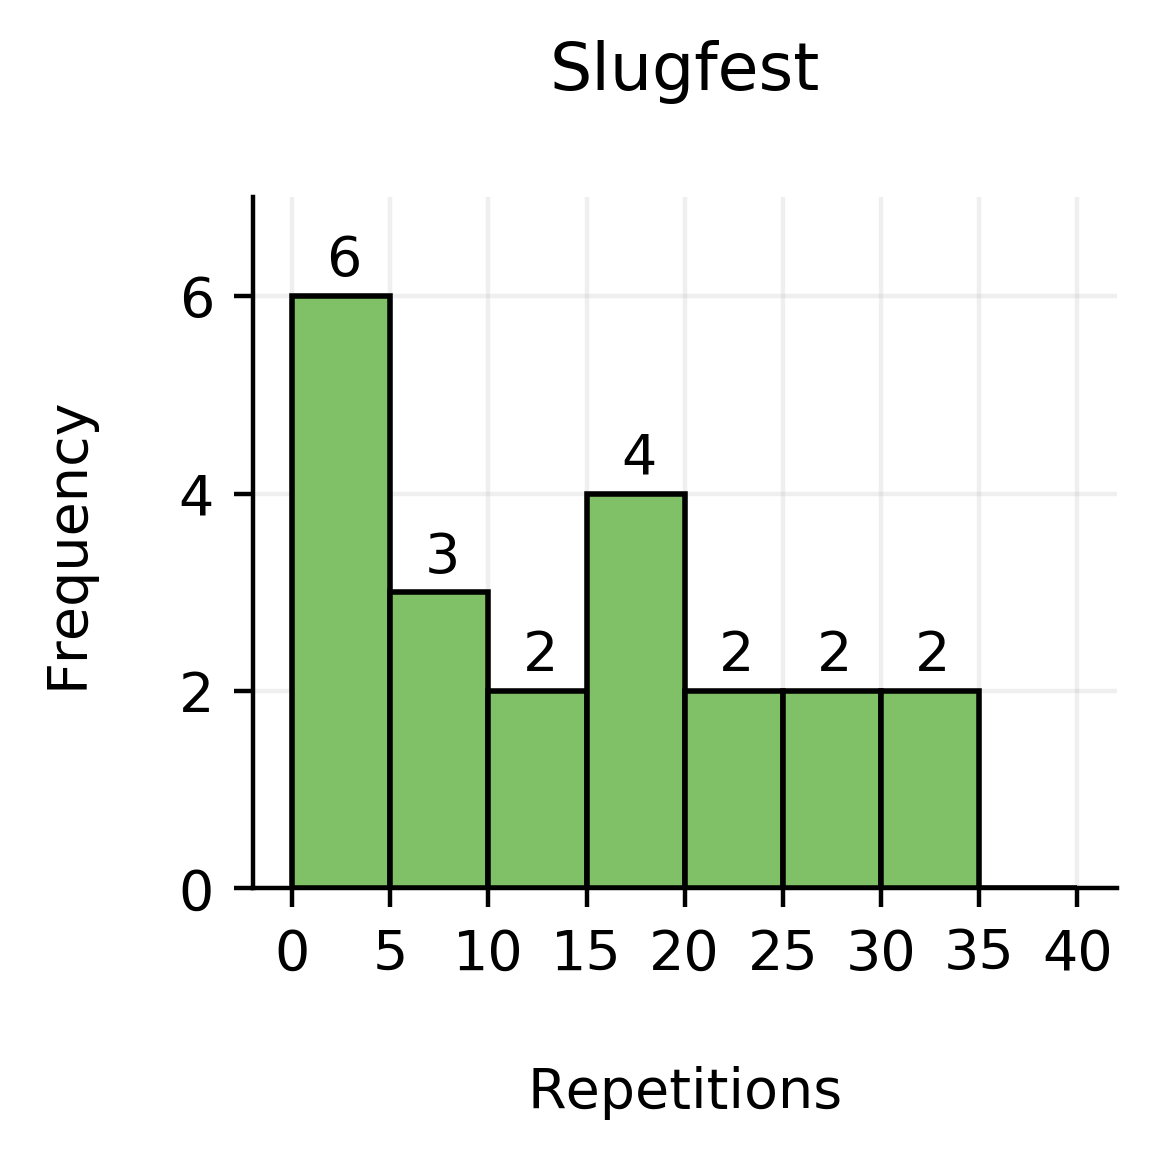

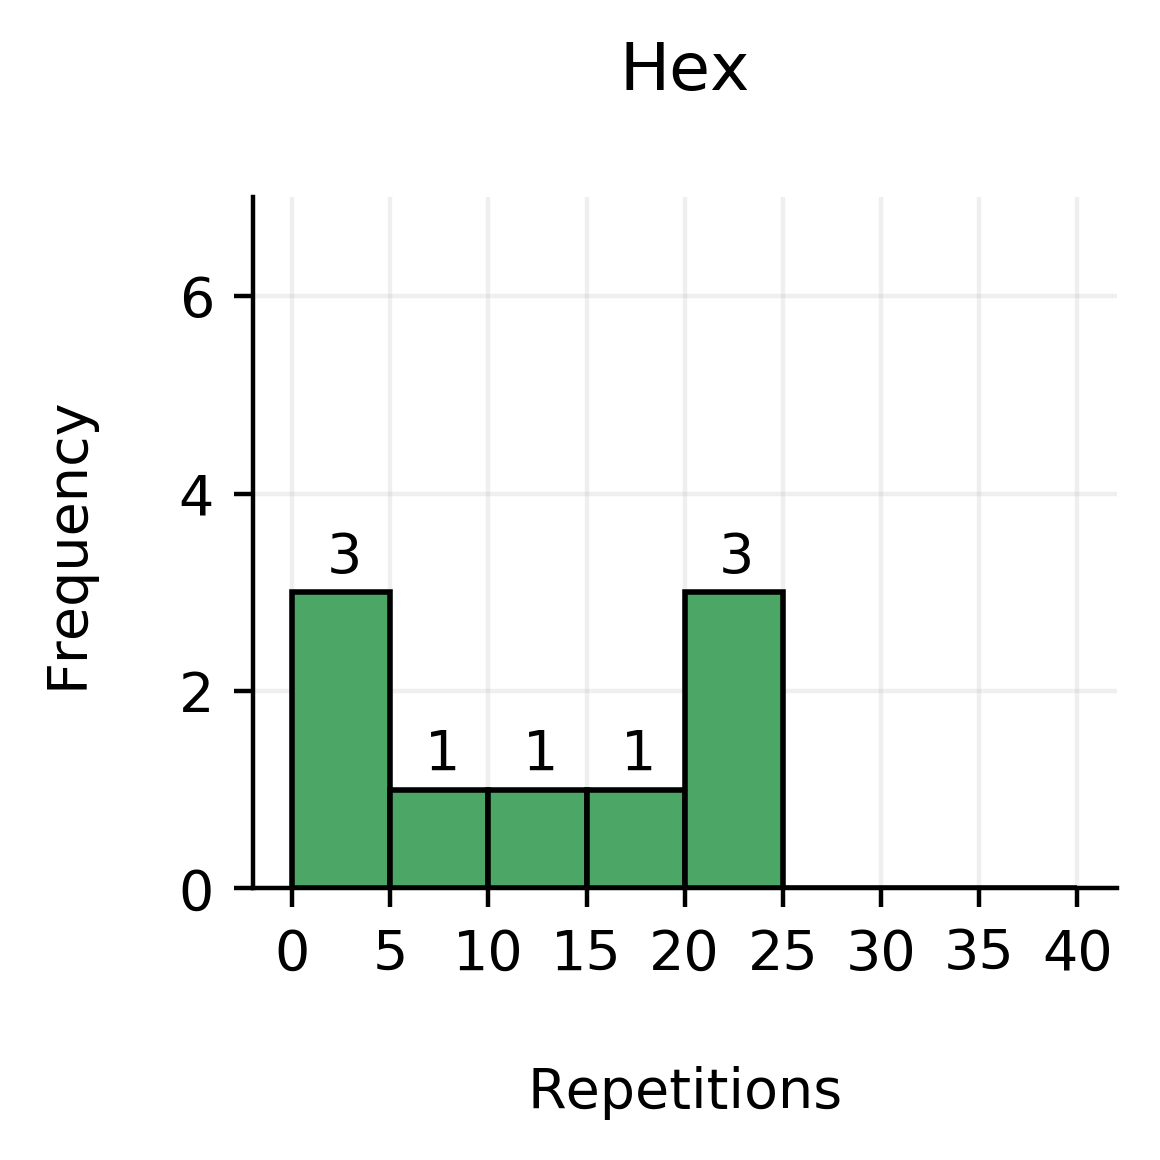

In [13]:
# top three histograms
for i in range(3):
    fig, ax = plt.subplots(figsize = (3,3), dpi = 400)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    hist = plt.hist(get_team_counts(sorted_teams[i][0]),bins[1:], color = cmap(cmap_vals_tri[i]), edgecolor ="k", zorder= 99)
    for j in range(len(hist[0])):
        if int(hist[0][j]) != 0:
            plt.text(hist[1][j]+1.75,hist[0][j]+0.2, str(int(hist[0][j])))

    plt.ylim(0,7)
    plt.xlabel("\nRepetitions")
    plt.ylabel("Frequency\n")
    plt.xticks(bins[1:])
    plt.title(sorted_teams[i][0]+ "\n")
    plt.grid("on", zorder = 0, alpha = 0.2)
    plt.tight_layout()
    if save:
        plt.savefig("./figs/" + (sorted_teams[i][0]).lower()+ "_hist.pdf")
    plt.show()

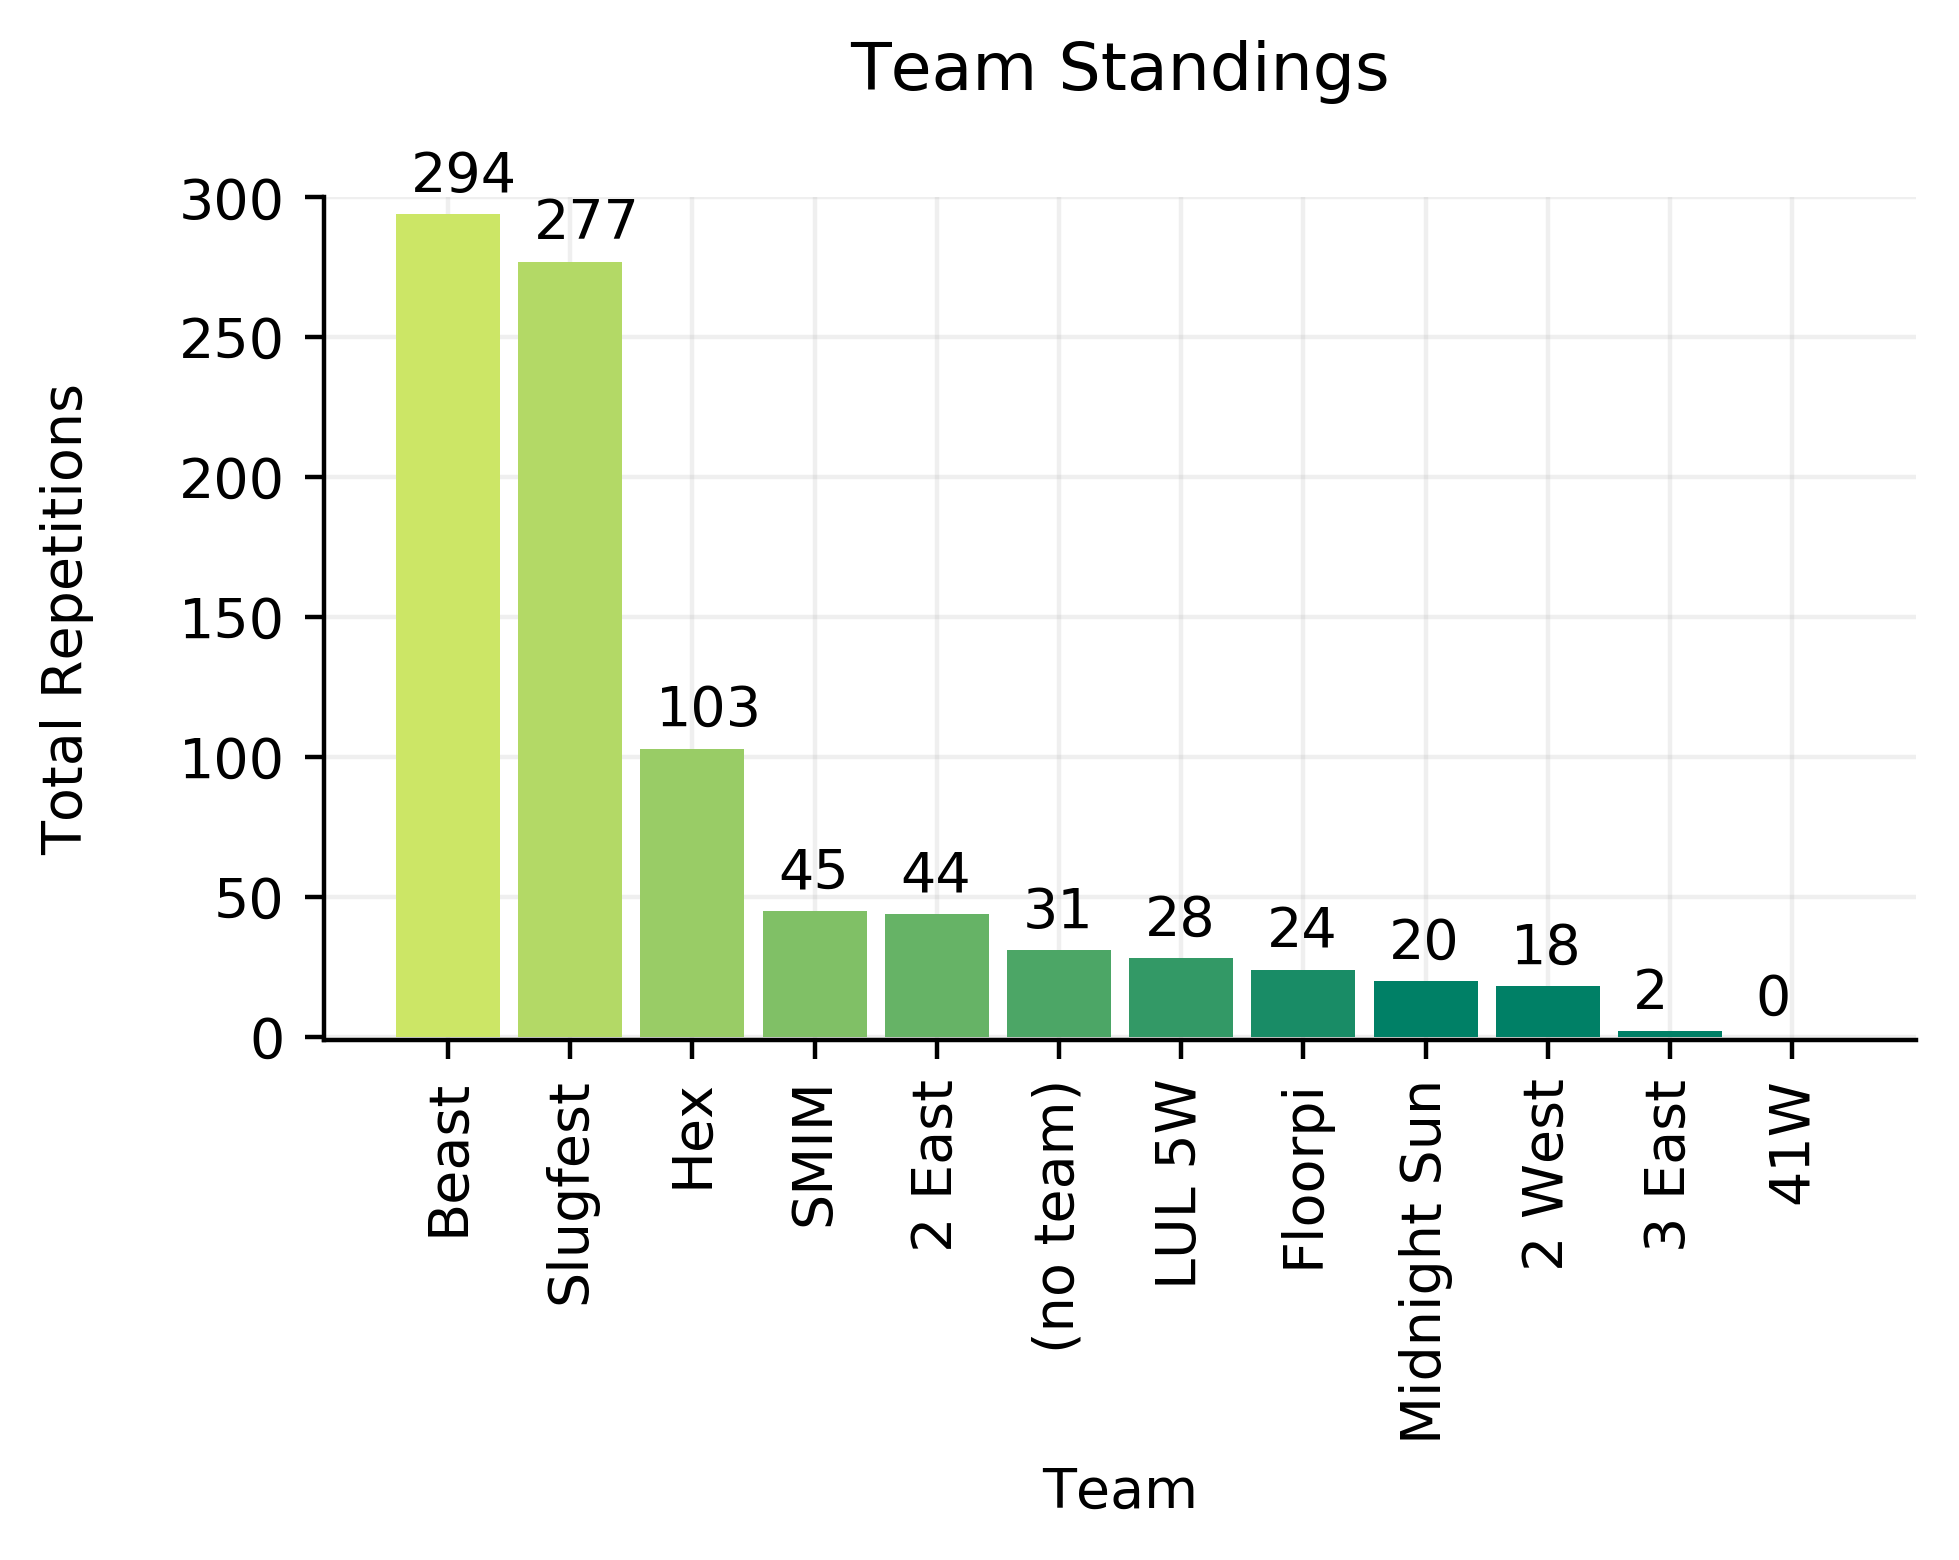

In [14]:
# team standings, reps
fig, ax = plt.subplots(figsize = (5,4), dpi = 400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(len(sorted_teams)):
    plt.bar(i,int(sorted_teams[i][1]), color = cmap(cmap_vals[i]), width = 0.85, zorder= 99)
    plt.text(i-0.3,int(sorted_teams[i][1])+8, sorted_teams[i][1], zorder = 99)

plt.ylim(-1,300)
plt.xticks(np.arange(len(sorted_teams)), np.asarray(sorted_teams)[:,0], rotation = 90)
plt.xlabel("Team")
plt.ylabel("Total Repetitions\n")
plt.title("Team Standings\n")
plt.grid("on", zorder = 0, alpha = 0.2)
plt.tight_layout()
if save:
    plt.savefig("./figs/team_standings.pdf")
plt.show()

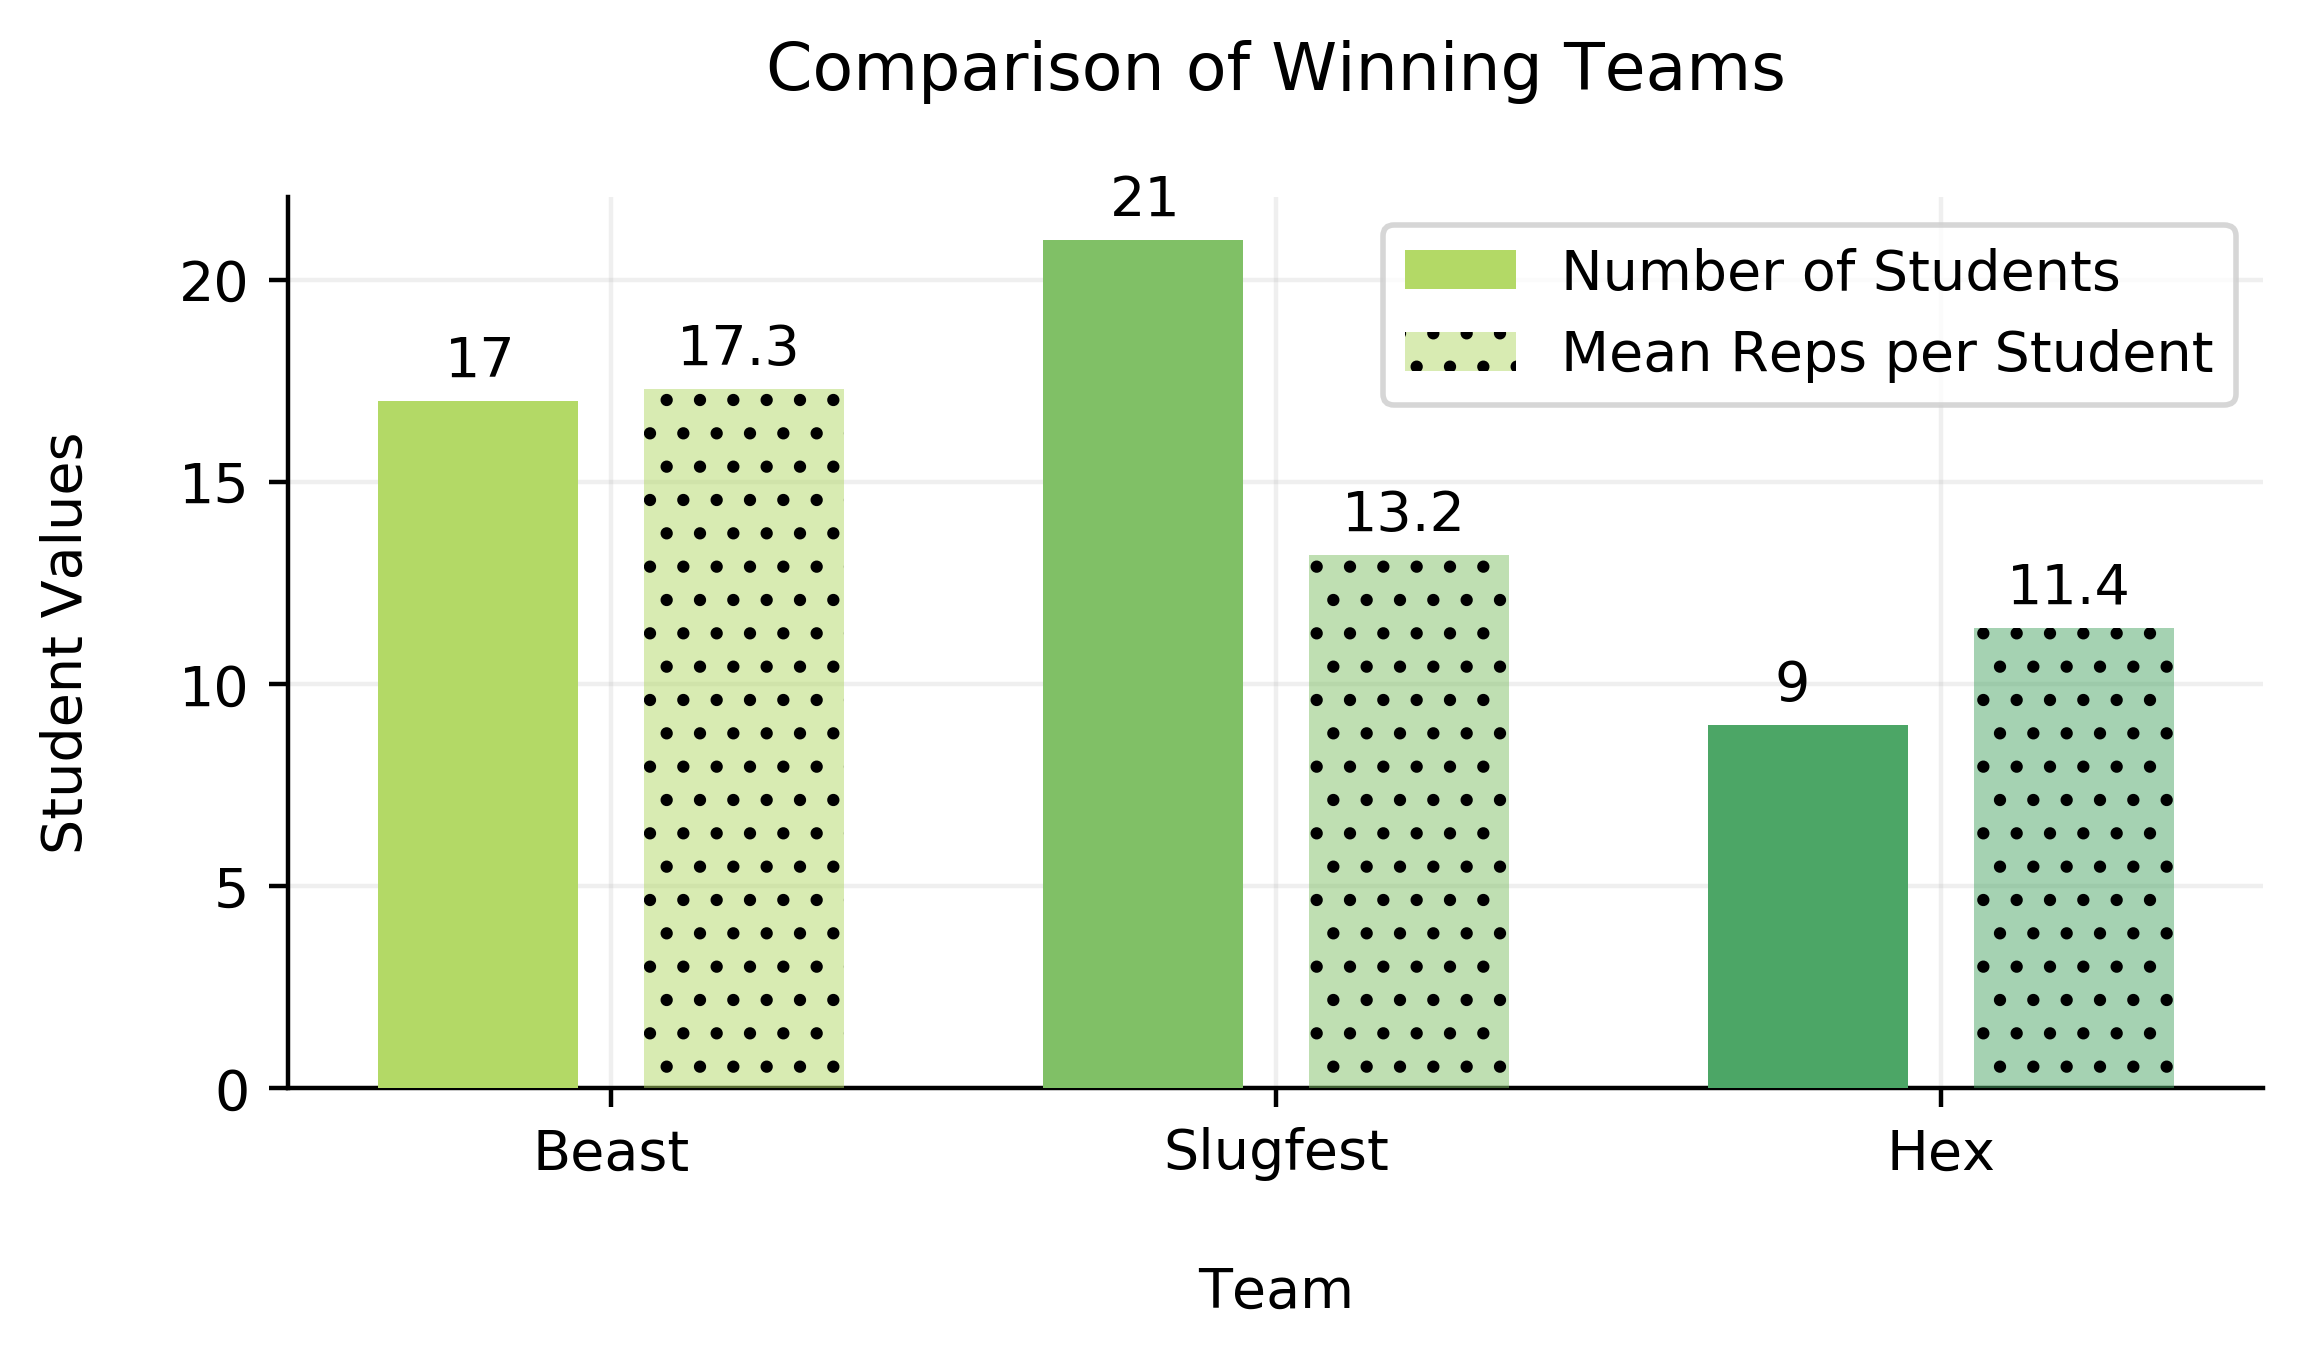

In [15]:
# student count
fig, ax = plt.subplots(figsize = (6,3.5), dpi = 400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(3):
    count = len(get_team_counts(sorted_teams[i][0]))
    total = int(sorted_teams[i][1])
    rate = np.round(total/count,1)
    
    plt.bar(i-0.2, count, color = cmap(cmap_vals_tri[i]), width = 0.3, zorder = 99)
    plt.bar(i+0.2, rate, color = cmap(cmap_vals_tri[i]), alpha = 0.5, hatch = "..", ecolor= 'r',width = 0.3, zorder = 99)
    plt.text(i-0.25, count+0.6, str(count))
    plt.text(i+0.1, rate+0.6, str(rate))

# plt.ylim(0,300)
plt.xticks(np.arange(3), np.asarray(sorted_teams)[:,0], rotation = 0)
plt.xlabel("\nTeam")
plt.ylabel("Student Values\n")
plt.title("Comparison of Winning Teams\n")
plt.grid("on", zorder = 0, alpha = 0.2)
plt.legend(["Number of Students", "Mean Reps per Student"], loc = 'best')
plt.tight_layout()
if save:
    plt.savefig("./figs/winning_comparison.pdf")
plt.show()

### Section 2: Antonio B. '22's Garmin Watch 

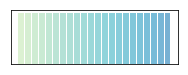

In [16]:
plt.figure(figsize=(3,1))
ant_cmap = plt.cm.get_cmap("YlGnBu")
ant_cmap_vals = np.arange(0.25,0.68,0.02)
for i in range(len(ant_cmap_vals)):
    plt.bar(i,1,color = ant_cmap(ant_cmap_vals[i]), alpha = 0.6)
plt.xticks([]); plt.yticks([])
plt.show()

In [17]:
ant_raw_data = np.asarray(list(csv.reader(open("./antonio_green_building_data.csv", "r"))))


In [18]:
ant_raw_data[:2] # example of raw data

array([['secs', ' cad', ' hr', ' km', ' kph', ' nm', ' watts', ' alt',
        ' lon', ' lat', ' headwind', ' slope', ' temp', ' interval',
        ' lrbalance', ' lte', ' rte', ' lps', ' rps', ' smo2', ' thb',
        ' o2hb', ' hhb'],
       ['1', '0', '113.667', '0', '4.5168', '0', '0', '0', '0', '0', '0',
        '0', '-427', '0', '-255', '0', '0', '0', '0', '0', '0', '0', '0']],
      dtype='<U13')

In [19]:
categories = raw_data[0] # lots of categories
ant_data = np.asarray(ant_raw_data[1:]) # table w/o categories

time = ant_data[:,0].astype('float') # time in seconds
hr = ant_data[:,2].astype('float') # heart rate

In [20]:
times = np.arange(0,time[-1],60*20) # 20 mins interval
time_stamps = ["0h 00m", "0h 20m", "0h 40m", "1h 00m", "1h 20m", "1h 40m", "2h 00m", "2h 20m", "2h 40m", "3h 00m", "3h 20m", "3h 40m"]


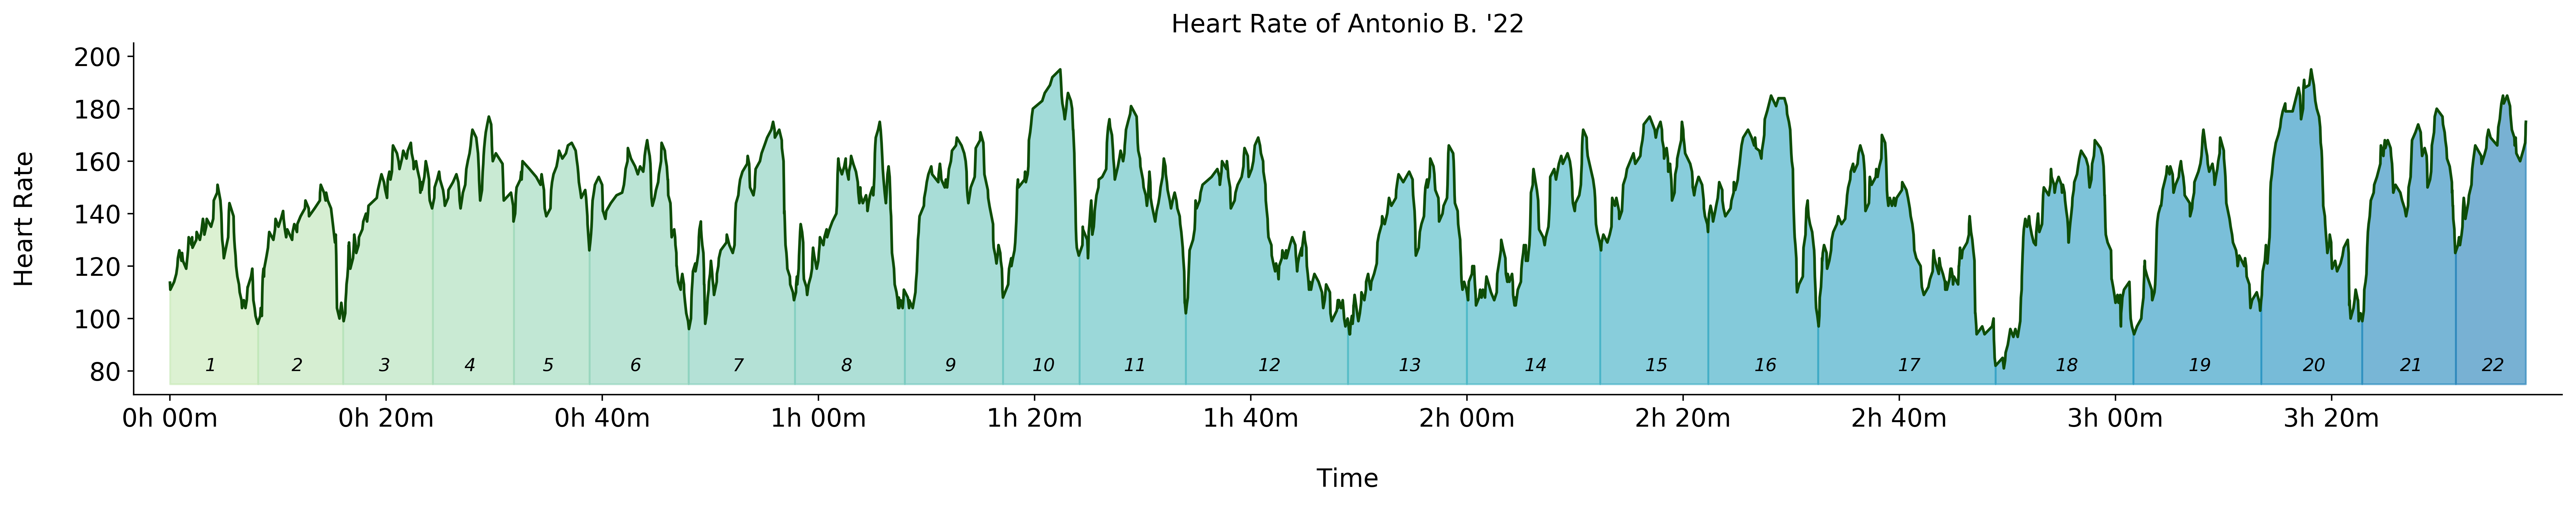

In [21]:
fig, ax = plt.subplots(figsize = (20,4), dpi = 400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# where the reps start (and end)
rep_time = np.array([1,490,962,1460,1910,2330,2880,3470,4080,4625,5050,5640,6540,7200,7940,8540,9150,10135,10900,11610,12170,12690, time[-1]])

for i in range(len(rep_time)-1):
    time_data = time[list(time).index(rep_time[i]):list(time).index(rep_time[i+1])]
    hr_data = hr[list(time).index(rep_time[i]):list(time).index(rep_time[i+1])]
    plt.fill_between(time_data, np.zeros(len(hr_data))+75, hr_data , color = ant_cmap(ant_cmap_vals[i]), alpha = 0.6)
    
plt.plot(time, hr, color = "#0E4D07", zorder = 99)

for i in range(22):
    plt.text(np.diff(rep_time[i:i+2])/2 + rep_time[i] - 50, 80, str(i+1), fontstyle='italic')

fs = 14
plt.xticks(times, time_stamps, fontsize = fs)
plt.yticks(fontsize = fs)
plt.xlabel("\nTime", fontsize = fs)
plt.ylabel("Heart Rate\n", fontsize = fs)
plt.ylim(min(hr)-10,max(hr)+10)
plt.xlim(-200,time[-1]+200)
plt.title("Heart Rate of Antonio B. '22", fontsize = fs)

plt.tight_layout()
if save:
    plt.savefig("./antonio_figs/heart_rate.pdf")
plt.show()

#### Heart Rate Animation
* Use ffmpeg to string together frames. 25 fps.

In [ ]:
save = False

In [ ]:
# where the reps start (and end)
rep_time = np.array([1,490,962,1460,1910,2330,2880,3470,4080,4625,5050,5640,6540,7200,7940,8540,9150,10135,10900,11610,12170,12690, time[-1]])

frame = 0
for i in range(22):
    
    # indices for rep
    start_ind = list(time).index(rep_time[i])
    end_ind = list(time).index(rep_time[i+1])
    
    # data that will be animated
    ani_time = time[start_ind:end_ind]
    ani_hr = hr[start_ind:end_ind]
    
    # number of frames
    div = 20
    sections = int(np.floor(len(ani_time)/div)) # how many segments of 10 fit in this rep?
    
    for k in range(sections):
        # plot design
        fig, ax = plt.subplots(figsize = (20,4), dpi = 400)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        fs = 14
        plt.xticks(times, time_stamps, fontsize = fs)
        plt.yticks(fontsize = fs)
        plt.xlabel("\nTime", fontsize = fs)
        plt.ylabel("Heart Rate\n", fontsize = fs)
        plt.ylim(min(hr)-10,max(hr)+10)
        plt.xlim(-200,time[-1]+200)
        plt.title("Heart Rate of Antonio B. '22", fontsize = fs)
        plt.tight_layout()
        
        # quickly fill in the past *sections* // (need to use loop to adjust colors)
        for j in range(i):
            time_data = time[list(time).index(rep_time[j]):list(time).index(rep_time[j+1])]
            hr_data = hr[list(time).index(rep_time[j]):list(time).index(rep_time[j+1])]
            plt.fill_between(time_data, np.zeros(len(hr_data))+75, hr_data , color = ant_cmap(ant_cmap_vals[j]), alpha = 0.6)
            plt.plot(time_data, hr_data, color = "#0E4D07", zorder = 99)
            plt.text(np.diff(rep_time[j:j+2])/2 + rep_time[j] - 50, 80, str(j+1), fontstyle='italic')
            j += 1
        
        # animated section
        plt.plot(ani_time[:(k*div)], ani_hr[:(k*div)], color = "#0E4D07", zorder = 99)
        plt.fill_between(ani_time[:(k*div)], np.zeros(len(ani_time[:(k*div)]))+75, ani_hr[:(k*div)], color = ant_cmap(ant_cmap_vals[i]), alpha = 0.6)
        if save:
            plt.savefig("./antonio_figs/ani/" + str(frame).zfill(4) + ".png")
            frame += 1
            
            if i == 21 and k == sections-1:
                plt.text(np.diff(rep_time[i:i+2])/2 + rep_time[i] - 50, 80, str(i+1), fontstyle='italic')
                plt.savefig("./antonio_figs/ani/" + str(frame).zfill(4) + ".png")
#         plt.show()
    